In [5]:
from descriptors import compute_features
from ply import read_ply, write_ply
import time
import matplotlib.pyplot as plt
from classification import FeaturesExtractor
import numpy as np


from skfeature.function.similarity_based import fisher_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

In [2]:
# Path of the training and test files
training_path = '../data/Benchmark_MVA/training'
test_path = '../data/Benchmark_MVA/test'

3D FEATURES

In [3]:
print('Collect Training Features')
t0 = time.time()

# Create a feature extractor
f_extractor = FeaturesExtractor()

# Collect training features and labels
training_features, training_labels = f_extractor.extract_training(training_path)

t1 = time.time()
print('Done in %.3fs\n' % (t1 - t0))

Collect Training Features
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Computing neighborhoods with radius 0.5
Done in 265.340s



In [5]:
feature_names = ['verticality', 'linearity', 'planarity' ,'sphericity', 'omnivariance', 'eigenentropy' ,'sum' ,'curvature']
feature_names2D = ['v', 'l', 'o', 'e', 's', 'c']
feature_names2D = [f'{name}_{axis}' for axis in ['yz', 'xz', 'xy'] for name in feature_names2D]

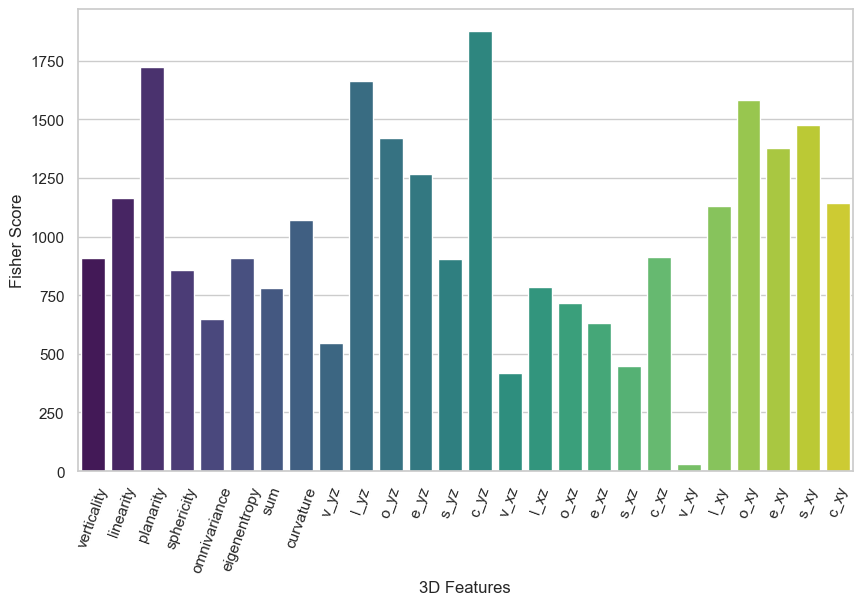

In [8]:
scores, _ = f_classif(training_features, training_labels)
# Plotting with seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_names+feature_names2D, y=scores, palette="viridis")

ax.set(xlabel='3D Features', ylabel='Fisher Score')
plt.xticks(rotation=70)
plt.show()

TRAINING RF WITHOUT 2D PROJECTION FEATURES

In [23]:
A = np.empty((0, 2))
print(A.shape)
B = np.random.rand(5, 2)
print(B.shape)
np.vstack((A, B))

(0, 2)
(5, 2)


array([[3.61713654e-01, 1.34843975e-04],
       [8.98754204e-01, 2.38703541e-02],
       [3.29367016e-01, 9.97653568e-01],
       [9.14359179e-01, 1.24435177e-01],
       [2.11595048e-01, 9.50279150e-01]])

In [17]:
print('Training Random Forest')
t0 = time.time()

# Create and train a random forest with scikit-learn
clf = RandomForestClassifier()

# clf.fit(training_features, training_labels)

unselected_features = [20]
selected_features = [i for i in range(training_features.shape[1]) if i not in unselected_features]

# Perform cross validation and show accuracy per category
predicted_labels = cross_val_predict(clf, training_features[:,:8], training_labels)

print('\nOverall Classification Report:\n', classification_report(training_labels, predicted_labels))

t1 = time.time()
print('Done in %.3fs\n' % (t1 - t0))

Training Random Forest

Overall Classification Report:
               precision    recall  f1-score   support

         1.0       0.90      0.89      0.90      1500
         2.0       0.62      0.63      0.62      1500
         3.0       0.75      0.71      0.73      1500
         4.0       0.35      0.18      0.24       500
         5.0       0.48      0.48      0.48      1500
         6.0       0.52      0.63      0.57      1500

    accuracy                           0.64      8000
   macro avg       0.60      0.59      0.59      8000
weighted avg       0.63      0.64      0.63      8000

Done in 6.676s



TRAINING RF WITH 2D PROJECTION FEATURES

In [11]:
print('Training Random Forest')
t0 = time.time()

# Create and train a random forest with scikit-learn
clf = RandomForestClassifier()

# clf.fit(training_features, training_labels)

# Perform cross validation and show accuracy per category
predicted_labels = cross_val_predict(clf, training_features, training_labels)

print('\nOverall Classification Report:\n', classification_report(training_labels, predicted_labels))

t1 = time.time()
print('Done in %.3fs\n' % (t1 - t0))

Training Random Forest

Overall Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.94      0.94      1500
         2.0       0.77      0.75      0.76      1500
         3.0       0.84      0.86      0.85      1500
         4.0       0.61      0.34      0.44       500
         5.0       0.68      0.73      0.70      1500
         6.0       0.66      0.71      0.69      1500

    accuracy                           0.77      8000
   macro avg       0.75      0.72      0.73      8000
weighted avg       0.77      0.77      0.77      8000

Done in 13.172s

